In [8]:
import equibind_inference 
import datasets.ligands as ligands
from commons.process_mols import get_receptor_inference, get_rec_graph, get_lig_graph_revised
import rdkit.Chem as Chem
import gzip
import datasets.ligands2 as ligands2
import importlib
importlib.reload(ligands2)
importlib.reload(equibind_inference)
from torch.utils.data import DataLoader
from rdkit.Chem import SDMolSupplier, SanitizeMol
import torch

In [2]:
args, cmdline_args = equibind_inference.parse_arguments(["-l", "/home/qzj517/POR-DD/data/raw_data/cyp_screen/test_3D_opt_1216.sdf",
"-r", "/home/qzj517/POR-DD/data/raw_data/cyp_screen/protein.pdb","--device", "cpu", "-o", "/home/qzj517/POR-DD/data/equibind_processed/testing2", "--no_skip"])
args = equibind_inference.get_default_args(args, cmdline_args)
rec_path = "/home/qzj517/POR-DD/data/raw_data/cyp_screen/protein.pdb"
dp = args.dataset_params
# rec_graph = get_rec_graph(*get_receptor_inference(rec_path),
#                                 use_rec_atoms=dp['use_rec_atoms'],
#                                 rec_radius=dp['rec_graph_radius'],
#                                 surface_max_neighbors=dp['surface_max_neighbors'],
#                                 surface_graph_cutoff=dp['surface_graph_cutoff'],
#                                 surface_mesh_cutoff=dp['surface_mesh_cutoff'],
#                                 c_alpha_max_neighbors=dp['c_alpha_max_neighbors'])
# rec_graph = rec_graph.to(args.device)

In [78]:
mols_old = [mol.GetConformer().GetPositions() for mol in SDMolSupplier("../data/equibind_processed/testing2/first_10_ligs.sdf")]
supp = SDMolSupplier("../data/equibind_processed/testing2/output.sdf")
mols_new = []
i = 0
for mol in supp:
    if i == 10:
        break
    mols_new.append(mol.GetConformer().GetPositions())
    i+= 1

In [79]:
for new, old in zip(mols_new, mols_old):
    print(((new - old)**2).sum())

1.2000000000184983e-07
1.1999999999815282e-07
4.000000000265573e-08
65.40009878999997
0.8332560999999988
9.99999999782176e-09
94.52793944000003
4.999999999981135e-08
1.0576106200000068
9.000000000104599e-08


In [3]:
rec_graph, model = equibind_inference.load_rec_and_model(args)

device = cpu


In [81]:
test = ligands2.Ligands("/home/qzj517/POR-DD/data/raw_data/cyp_screen/test_3D_opt_1216.sdf", rec_graph, args, lazy = True, skips = range(1216))
loader = DataLoader(test, batch_size = 8, collate_fn = test.collate)

In [82]:
it = iter(loader)
next(it)

ValueError: not enough values to unpack (expected 6, got 0)

In [91]:
success_path = "/home/qzj517/POR-DD/data/equibind_processed/testing/success.txt"
failed_path = "/home/qzj517/POR-DD/data/equibind_processed/testing/failed.txt"
if os.path.exists(success_path) and os.path.exists(failed_path):
    with open(success_path) as successes, open(failed_path) as failures:
        previous_work = successes.readlines()
        previous_work += failures.readlines()
    previous_work = set(map(lambda tup: int(tup.split(" ")[0]), previous_work))

In [92]:
set(range(1216)) - previous_work

set()

In [80]:
for batch in loader:
    print(len(batch[0]))

[10:34:57] Warning: molecule is tagged as 3D, but all Z coords are zero


[2022-05-27 10:34:57.537970] The lig_radius 5 was too small for one lig atom such that it had no neighbors. So we connected 0 to the closest other lig atom []
[2022-05-27 10:34:58.613720] The lig_radius 5 was too small for one lig atom such that it had no neighbors. So we connected 3 to the closest other lig atom [0]
[2022-05-27 10:35:01.513563] The lig_radius 5 was too small for one lig atom such that it had no neighbors. So we connected 11 to the closest other lig atom [52]
[2022-05-27 10:35:01.514374] The lig_radius 5 was too small for one lig atom such that it had no neighbors. So we connected 12 to the closest other lig atom [51]


In [48]:
batch[-1]

((None, 998, 'Activated charcoal'),)

In [51]:
filename = "/home/qzj517/POR-DD/data/raw_data/zinc/with_script/mega.sdf"

In [57]:
test = ligands2.Ligands(filename, rec_graph, args, lazy=False, slice = (0, 100))
dataloader = DataLoader(test, batch_size = 8, collate_fn = test.collate, num_workers = 1)

In [59]:
it = iter(dataloader)

In [60]:
next(it)

([<rdkit.Chem.rdchem.Mol at 0x7f021bf3ec30>,
 [tensor([[-3.0768,  3.3059, -2.0798],
          [-2.1704,  3.8406, -1.4641],
          [-1.8290,  4.9766, -1.7461],
          [-1.4762,  3.0997, -0.3505],
          [-2.1368,  1.8050, -0.1375],
          [-3.5494,  1.9875,  0.2219],
          [-3.6441,  2.6733,  1.5863],
          [-5.0567,  2.8558,  1.9456],
          [-5.7173,  1.5611,  2.1586],
          [-5.0183,  0.8169,  3.2671],
          [-4.1066,  1.3483,  3.8777],
          [-5.3647, -0.3165,  3.5533],
          [-5.1921,  3.7168,  3.1281],
          [-6.6130,  4.2082,  3.2317],
          [-7.4367,  3.8716,  2.3982],
          [-6.9388,  4.9423,  4.1489],
          [-2.0014,  0.9440, -1.3200],
          [-0.6063,  0.3763, -1.3710],
          [ 0.1692,  0.5813, -0.4528],
          [-0.2531, -0.2879, -2.3304],
          [-0.4326,  2.9353, -0.6187],
          [-1.5276,  3.6888,  0.5652],
          [-4.0387,  2.6061, -0.5305],
          [-4.0409,  1.0157,  0.2688],
          [-3.1548,

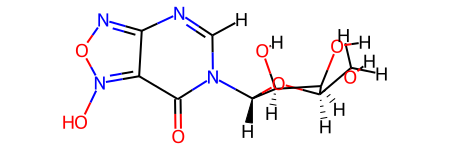

In [127]:
test.supplier[next(it)]

In [60]:
datloader = DataLoader(test, batch_size = 8, collate_fn = test.collate(), num_workers = 8)

In [61]:
for batch in datloader:
    batch

In [290]:
for _ in range(1200//8):
    next(it)

In [218]:
from rdkit.Chem import SDMolSupplier

In [216]:
supp = Chem.SDMolSupplier(filename)
len(supp)

3344652

In [112]:
getname = lambda supp, idx: supp.GetItemText(idx if idx >= 0 else (len(supp)+idx)).split("\n", 1)[0]

In [120]:
names = []
for i, mol in enumerate(supp):
    if mol:
        names.append(mol.GetProp('_Name'))
    if i == 10**4:
        break

[14:01:10] Explicit valence for atom # 10 N, 4, is greater than permitted
[14:01:10] ERROR: Could not sanitize molecule ending on line 100879
[14:01:10] ERROR: Explicit valence for atom # 10 N, 4, is greater than permitted
[14:01:10] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:01:10] ERROR: Could not sanitize molecule ending on line 148809
[14:01:10] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[14:01:10] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:01:10] ERROR: Could not sanitize molecule ending on line 176481
[14:01:10] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
[14:01:11] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:01:11] ERROR: Could not sanitize molecule ending on line 190799
[14:01:11] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
[14:01:11] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:01:11] ERROR: Could not sanitize mo

In [121]:
[getname(supp, i) for i in range(len(supp))]

['ZINC000019364242',
 'ZINC000022589819',
 'ZINC000023377883',
 'ZINC000023377883',
 'ZINC000022040791',
 'ZINC000001530600',
 'ZINC000001532183',
 'ZINC000001718508',
 'ZINC000019366122',
 'ZINC000408525779',
 'ZINC000408525781',
 'ZINC000015324639',
 'ZINC000095160903',
 'ZINC000952968052',
 'ZINC000584886207',
 'ZINC000001241905',
 'ZINC000067982206',
 'ZINC000020193305',
 'ZINC000005273846',
 'ZINC000005273847',
 'ZINC000005273845',
 'ZINC000097638088',
 'ZINC000096096773',
 'ZINC000106709332',
 'ZINC000055364338',
 'ZINC000002491909',
 'ZINC000005807322',
 'ZINC000005807319',
 'ZINC000005807321',
 'ZINC000005807320',
 'ZINC000004158733',
 'ZINC000035361487',
 'ZINC000067872388',
 'ZINC000012378687',
 'ZINC000223664599',
 'ZINC000223664599',
 'ZINC000001572132',
 'ZINC000071793322',
 'ZINC000067872387',
 'ZINC000001070734',
 'ZINC000025561797',
 'ZINC000008671294',
 'ZINC000008830751',
 'ZINC000008830749',
 'ZINC000008952459',
 'ZINC000001575523',
 'ZINC000004545910',
 'ZINC0000015